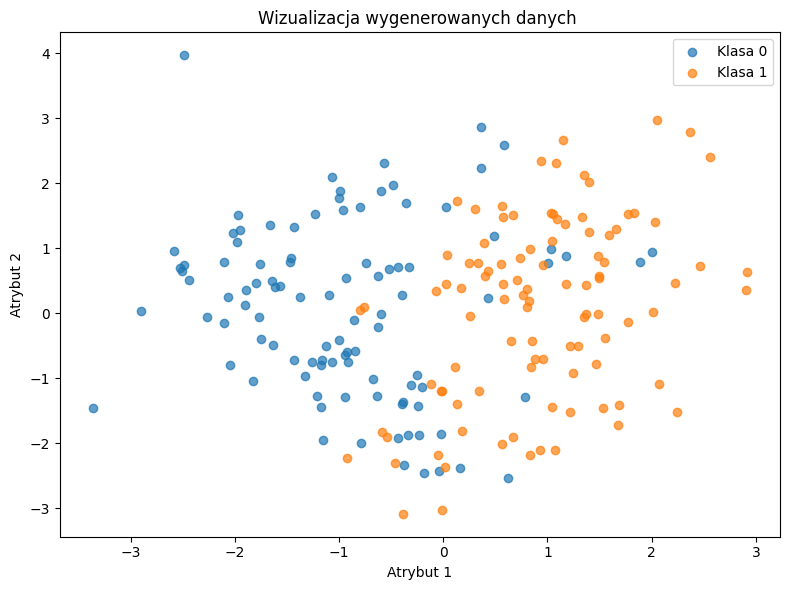

In [68]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=2,
    n_classes=2,
    random_state=42
)

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Klasa 0', alpha=0.7)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Klasa 1', alpha=0.7)
plt.title('Wizualizacja wygenerowanych danych ')
plt.xlabel('Atrybut 1')
plt.ylabel('Atrybut 2')
plt.legend()
plt.tight_layout()
plt.show()


In [69]:
import numpy as np
import pandas as pd
import time

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=2,
    n_classes=2,
    random_state=42
)

classifiers = [
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    KNeighborsClassifier(),
    SVC(probability=True),
    DecisionTreeClassifier()
]
names = ["GaussianNB", "QDA", "KNeighbors", "SVC", "DecisionTree"]

results = []
n_iter = 100
for name, clf in zip(names, classifiers):
    accs, recs, precs, f1s, rocs = [], [], [], [], []
    train_times, test_times = [], []
    
    for _ in range(n_iter):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        
        t0 = time.perf_counter()
        clf.fit(X_train, y_train)
        train_times.append(time.perf_counter() - t0)
        
        t1 = time.perf_counter()
        y_pred = clf.predict(X_test)
        test_times.append(time.perf_counter() - t1)
        
        if hasattr(clf, "predict_proba"):
            y_score = clf.predict_proba(X_test)[:, 1]
        else:
            y_score = clf.decision_function(X_test)
        
        accs.append(accuracy_score(y_test, y_pred))
        recs.append(recall_score(y_test, y_pred))
        precs.append(precision_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))
        rocs.append(roc_auc_score(y_test, y_score))
    
    results.append({
        "classifier": name,
        "accuracy_score": np.mean(accs),
        "recall_score": np.mean(recs),
        "precision_score": np.mean(precs),
        "f1_score": np.mean(f1s),
        "roc_auc": np.mean(rocs),
        "train_time": np.mean(train_times),
        "test_time": np.mean(test_times)
    })

df_results = pd.DataFrame(results).set_index("classifier")
print(df_results)


              accuracy_score  recall_score  precision_score  f1_score  \
classifier                                                              
GaussianNB          0.861833      0.875969         0.853706  0.862414   
QDA                 0.857000      0.892646         0.836507  0.860238   
KNeighbors          0.830333      0.851118         0.817260  0.830252   
SVC                 0.852167      0.882030         0.834914  0.854960   
DecisionTree        0.819333      0.816354         0.821599  0.814622   

               roc_auc  train_time  test_time  
classifier                                     
GaussianNB    0.919123    0.000828   0.000264  
QDA           0.924351    0.000816   0.000282  
KNeighbors    0.914739    0.000703   0.003986  
SVC           0.908250    0.003128   0.000644  
DecisionTree  0.821181    0.000932   0.000213  


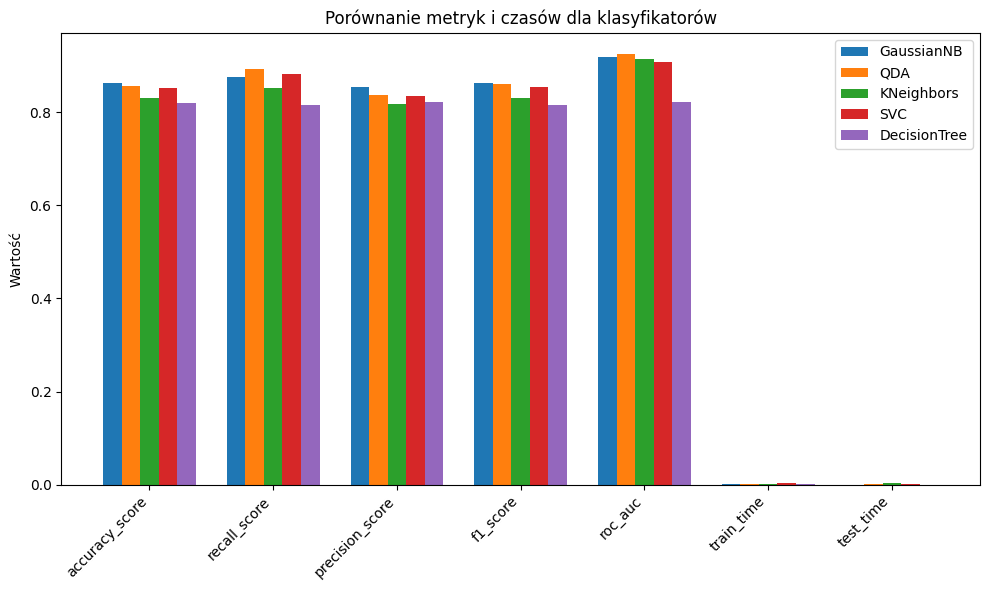

In [70]:
metrics = df_results.columns.tolist()
classifiers = df_results.index.tolist()

x = np.arange(len(metrics))
width = 0.15

fig, ax = plt.subplots(figsize=(10, 6))

for i, clf in enumerate(classifiers):
    ax.bar(x + i * width, df_results.loc[clf].values, width, label=clf)

ax.set_xticks(x + width * (len(classifiers) - 1) / 2)
ax.set_xticklabels(metrics, rotation=45, ha='right')
ax.set_ylabel('Wartość')
ax.set_title('Porównanie metryk i czasów dla klasyfikatorów')
ax.legend()

plt.tight_layout()
plt.show()

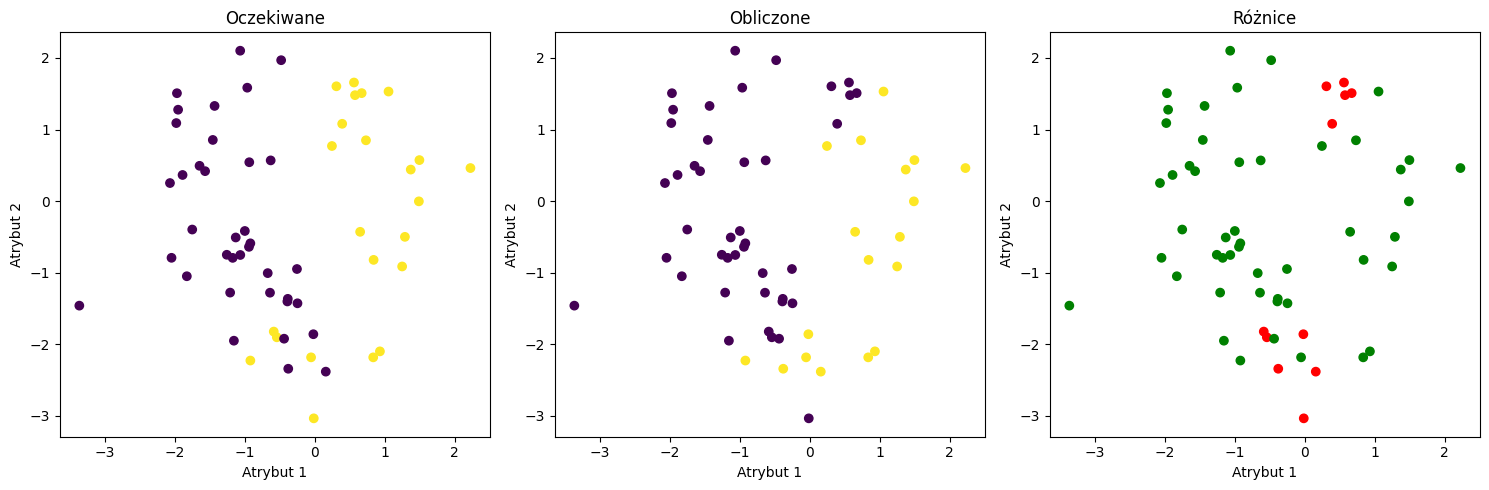

In [71]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=2,
    n_classes=2,
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

errors = (y_pred != y_test)
colors = ['red' if err else 'green' for err in errors]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test)
axes[0].set_title('Oczekiwane')
axes[0].set_xlabel('Atrybut 1')
axes[0].set_ylabel('Atrybut 2')

axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
axes[1].set_title('Obliczone')
axes[1].set_xlabel('Atrybut 1')
axes[1].set_ylabel('Atrybut 2')

axes[2].scatter(X_test[:, 0], X_test[:, 1],color=colors)
axes[2].set_title('Różnice')
axes[2].set_xlabel('Atrybut 1')
axes[2].set_ylabel('Atrybut 2')

plt.tight_layout()
plt.show()

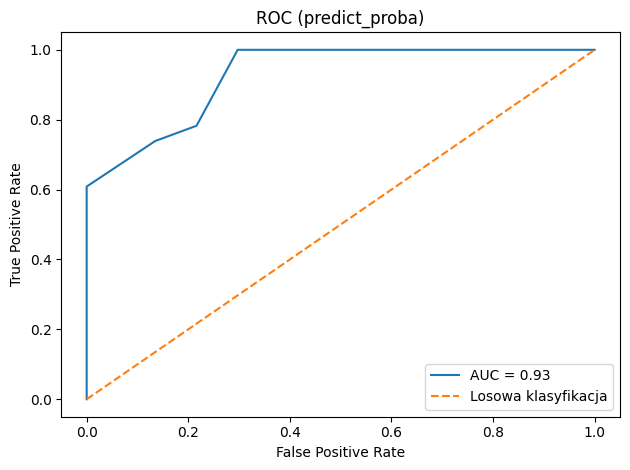

In [72]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score

X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=2,
    n_classes=2,
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

# predict_proba - uzyskanie prawdopodobieństwa klasy pozytywnej
y_score = clf.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc_value = roc_auc_score(y_test, y_score)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc_value:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Losowa klasyfikacja')
plt.title('ROC (predict_proba)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.tight_layout()
plt.show()


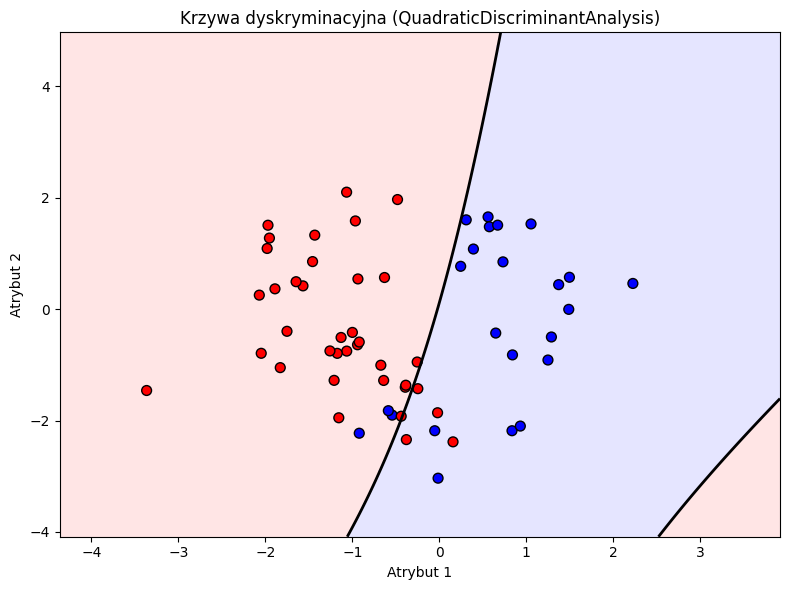

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

X, y = make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=2, class_sep=1.0, random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

probs = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = probs.reshape(xx.shape)

cmap_light = ListedColormap(['#FFCCCC', '#CCCCFF'])
cmap_bold  = ListedColormap(['#FF0000', '#0000FF'])

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z >= 0.5, alpha=0.5, cmap=cmap_light)
plt.contour(xx, yy, Z, levels=[0.5], colors='k', linewidths=2)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold,
            edgecolor='k', s=50)

plt.title('Krzywa dyskryminacyjna (QuadraticDiscriminantAnalysis)')
plt.xlabel('Atrybut 1')
plt.ylabel('Atrybut 2')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.tight_layout()
plt.show()


In [74]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=2,
    class_sep=1.0,
    random_state=42
)

clf = SVC(kernel='rbf', probability=True, random_state=42)

params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10]
}

grid = GridSearchCV(clf, params, cv=5, scoring='roc_auc')
grid.fit(X, y)

print("Najlepsze parametry:", grid.best_params_)
print("Najlepsze ROC AUC:", grid.best_score_)

Najlepsze parametry: {'C': 0.1, 'gamma': 10}
Najlepsze ROC AUC: 0.9199999999999999


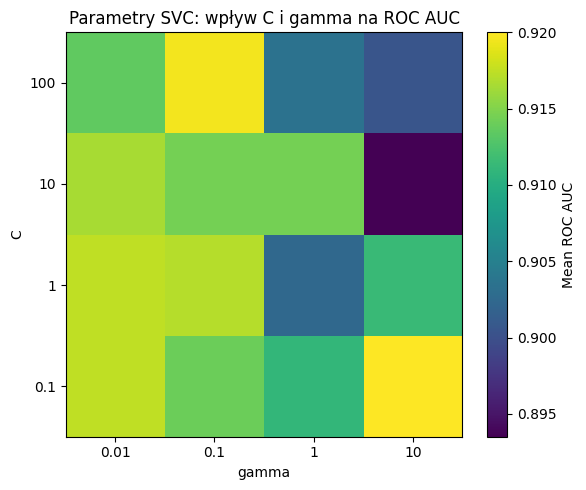

In [75]:
from sklearn.model_selection import cross_val_score

param_C = [0.1, 1, 10, 100]
param_gamma = [0.01, 0.1, 1, 10]

scores = np.zeros((len(param_C), len(param_gamma)))
for i, C in enumerate(param_C):
    for j, gamma in enumerate(param_gamma):
        clf.set_params(C=C, gamma=gamma)
        cv_scores = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
        scores[i, j] = cv_scores.mean()

plt.figure(figsize=(6, 5))
plt.imshow(scores, aspect='auto', origin='lower')
plt.colorbar(label='Mean ROC AUC')
plt.xticks(range(len(param_gamma)), param_gamma)
plt.yticks(range(len(param_C)), param_C)
plt.xlabel('gamma')
plt.ylabel('C')
plt.title('Parametry SVC: wpływ C i gamma na ROC AUC')
plt.tight_layout()
plt.show()

In [76]:
n_iter = 100
all_y_pred = []
all_y_test = []

for _ in range(n_iter):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    all_y_pred.append(y_pred)
    all_y_test.append(y_test)

print("y_test:", all_y_test[0])
print("y_pred:", all_y_pred[0])

y_test: [0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1
 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1]
y_pred: [1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1
 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1]


Średnie metryki i czasy dla SVC(C=0.1, gamma=10) po 100 iteracjach:
      accuracy_score  recall_score  precision_score  f1_score   roc_auc  \
mean        0.842667       0.85363         0.838925  0.842644  0.894508   

      train_time  test_time  
mean    0.006591   0.000954  


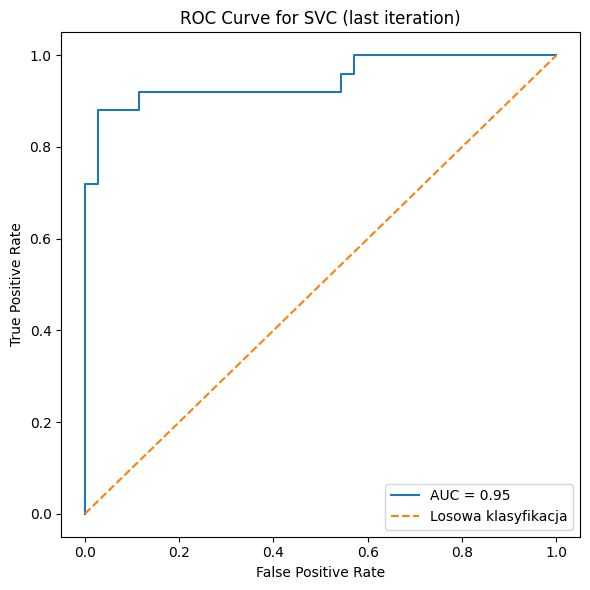

In [77]:
metrics_list = []

for _ in range(n_iter):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    start_train = time.perf_counter()
    clf.fit(X_train, y_train)
    train_time = time.perf_counter() - start_train

    start_test = time.perf_counter()
    y_pred = clf.predict(X_test)
    test_time = time.perf_counter() - start_test

    y_score = clf.predict_proba(X_test)[:, 1]

    metrics_list.append({
        "accuracy_score":  accuracy_score(y_test, y_pred),
        "recall_score":    recall_score(y_test, y_pred),
        "precision_score": precision_score(y_test, y_pred),
        "f1_score":        f1_score(y_test, y_pred),
        "roc_auc":         roc_auc_score(y_test, y_score),
        "train_time":      train_time,
        "test_time":       test_time
    })

df_metrics = pd.DataFrame(metrics_list)
df_avg = df_metrics.mean().to_frame(name="mean").T

print("Średnie metryki i czasy dla SVC(C=0.1, gamma=10) po 100 iteracjach:")
print(df_avg)

fpr, tpr, _ = roc_curve(y_test, y_score)
auc_value = roc_auc_score(y_test, y_score)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_value:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Losowa klasyfikacja')
plt.title('ROC Curve for SVC (last iteration)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()

plt.show()